In [4]:
import numpy as np
import pandas as pd

# Data downloading and cleaning

In [5]:
url = 'https://raw.githubusercontent.com/gsbDBI/ExperimentData/master/School/bruhn2016.csv'
df = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

In [3]:
df.columns

Index(['outcome.test.score', 'treatment', 'school', 'is.female',
       'mother.attended.secondary.school', 'father.attened.secondary.school',
       'failed.at.least.one.school.year', 'family.receives.cash.transfer',
       'has.computer.with.internet.at.home', 'is.unemployed',
       'has.some.form.of.income', 'saves.money.for.future.purchases',
       'intention.to.save.index', 'makes.list.of.expenses.every.month',
       'negotiates.prices.or.payment.methods', 'financial.autonomy.index'],
      dtype='object')

In [6]:
df

,outcome.test.score,treatment,school,is.female,mother.attended.secondary.school,father.attened.secondary.school,failed.at.least.one.school.year,family.receives.cash.transfer,has.computer.with.internet.at.home,is.unemployed,has.some.form.of.income,saves.money.for.future.purchases,intention.to.save.index,makes.list.of.expenses.every.month,negotiates.prices.or.payment.methods,financial.autonomy.index
0,47.367374,0,17018390,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,29.0,0.0,1.0,52.0
1,58.176758,1,33002614,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,41.0,0.0,0.0,27.0
2,56.671661,1,35002914,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,48.0,0.0,1.0,56.0
3,29.079376,0,35908915,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,0.0,0.0,27.0
4,49.563534,1,33047324,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,50.0,0.0,1.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17294,49.489826,1,35012178,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,34.0,0.0,1.0,43.0
17295,56.457314,0,35005320,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,15.0,0.0,0.0,35.0
17296,59.700623,0,33016070,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,0.0,41.0,0.0,0.0,24.0
17297,57.515606,0,53007514,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,79.0,0.0,1.0,46.0


In [6]:
D = df.treatment

In [7]:
X = df[['is.female','mother.attended.secondary.school', 'father.attened.secondary.school','failed.at.least.one.school.year', 'family.receives.cash.transfer',
       'has.computer.with.internet.at.home', 'is.unemployed',
       'has.some.form.of.income']]
y = df['outcome.test.score'] # test score is our outcome variable

In [8]:
for col in X.columns:
  X[col + "_isna"] = X[col].isna()
  median = X[col].median()
  X[col].fillna(median, inplace = True)

In [9]:
from sklearn.model_selection import train_test_split
X, Xtest, D, Dtest, y, ytest = train_test_split(X, D, y, train_size=.7, shuffle=True, random_state=123)
Xval, Xtest, Dval, Dtest, yval, ytest = train_test_split(Xtest, Dtest, ytest, train_size=.5, shuffle=True, random_state=123)

# Part a: ATE with low-dim linear model 

In [10]:
!pip install Formula

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 17.2 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [11]:
!pip install formulaic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 KB 5.9 MB/s eta 0:00:00


In [15]:
from statsmodels.api import OLS
from formulaic import Formula
dfX = X.copy()
dfX['D'] = D
dfX = Formula('D * (' + '+'.join(X.columns) + ')').get_model_matrix(dfX)

display(OLS(y, dfX).fit(cov_type='HC1').summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     outcome.test.score   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     41.63
Date:                Thu, 23 Mar 2023   Prob (F-statistic):          1.12e-252
Time:                        06:30:22   Log-Likelihood:                -49158.
No. Observations:               12109   AIC:                         9.838e+04
Df Residuals:                   12075   BIC:                         9.864e+04
Df Model:                          33                                         
Covariance Type:                  HC1                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    56.2298      0.573     98.193      0.000      55.107      57.352
D                                             5.0722      0.790      6.422      0.000       3.524       6.620
failed.at.least.one.school.year              -6.5612      0.431    -15.226      0.000      -7.406      -5.717
failed.at.least.one.school.year_isna         -4.9095      1.794     -2.737      0.006      -8.425      -1.394
family.receives.cash.transfer                -0.7341      0.428     -1.714      0.087      -1.573       0.105
family.receives.cash.transfer_isna           -0.8990      2.421     -0.371      0.710      -5.644       3.846
father.attened.secondary.school               0.3746      0.461      0.813      0.416      -0.528       1.277
father.attened.secondary.school_isna         -0.5130      1.398     -0.367      0.714      -3.254       2.228
has.computer.with.internet.at.home            0.0439      0.431      0.102      0.919      -0.800       0.888
has.computer.with.internet.at.home_isna       1.0406      1.728      0.602      0.547      -2.346       4.427
has.some.form.of.income                       1.3793      0.436      3.166      0.002       0.525       2.233
has.some.form.of.income_isna                 -6.5571      2.405     -2.726      0.006     -11.271      -1.843
is.female                                     3.1369      0.402      7.799      0.000       2.349       3.925
is.female_isna                               -0.9020      2.810     -0.321      0.748      -6.410       4.606
is.unemployed                                -2.2720      0.452     -5.027      0.000      -3.158      -1.386
is.unemployed_isna                            1.4628      2.418      0.605      0.545      -3.276       6.202
mother.attended.secondary.school              1.1712      0.447      2.622      0.009       0.296       2.047
mother.attended.secondary.school_isna         0.8781      1.761      0.499      0.618      -2.574       4.330
D:failed.at.least.one.school.year            -0.0671      0.589     -0.114      0.909      -1.221       1.087
D:failed.at.least.one.school.year_isna        0.5329      2.506      0.213      0.832      -4.379       5.444
D:family.receives.cash.transfer              -1.8251      0.590     -3.093      0.002      -2.981      -0.669
D:family.receives.cash.transfer_isna         -4.4947      3.217     -1.397      0.162     -10.800       1.811
D:father.attened.secondary.school             1.0311      0.643      1.604      0.109      -0.229       2.291
D:father.attened.secondary.school_isna       -0.8994      2.003     -0.449      0.653      -4.826       3.027
D:has.computer.with.internet.at.home         -0.6109      0.591     -1.034      0.301      -1.769       0.548
D:h

# Part b: ATE with high-dim linear model

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.base import BaseEstimator, clone
def dml(X, D, y, modely, modeld, *, nfolds, classifier=False):
    '''
    DML for the Partially Linear Model setting with cross-fitting
    
    Input
    -----
    X: the controls
    D: the treatment
    y: the outcome
    modely: the ML model for predicting the outcome y
    modeld: the ML model for predicting the treatment D
    nfolds: the number of folds in cross-fitting
    classifier: bool, whether the modeld is a classifier or a regressor
    
    Output
    ------
    point: the point estimate of the treatment effect of D on y
    stderr: the standard error of the treatment effect
    yhat: the cross-fitted predictions for the outcome y
    Dhat: the cross-fitted predictions for the treatment D
    resy: the outcome residuals
    resD: the treatment residuals
    epsilon: the final residual-on-residual OLS regression residual
    '''
    cv = KFold(n_splits=nfolds, shuffle=True, random_state=123) # shuffled k-folds
    yhat = cross_val_predict(modely, X, y, cv=cv, n_jobs=-1) # out-of-fold predictions for y
    # out-of-fold predictions for D
    # use predict or predict_proba dependent on classifier or regressor for D
    if classifier: 
        Dhat = cross_val_predict(modeld, X, D, cv=cv, method='predict_proba', n_jobs=-1)[:, 1]
    else:
        Dhat = cross_val_predict(modeld, X, D, cv=cv, n_jobs=-1)
    # calculate outcome and treatment residuals
    resy = y - yhat
    resD = D - Dhat
    # final stage ols based point estimate and standard error
    point = np.mean(resy * resD) / np.mean(resD**2)
    epsilon = resy - point * resD
    var = np.mean(epsilon**2 * resD**2) / np.mean(resD**2)**2
    stderr = np.sqrt(var / X.shape[0])
    return point, stderr, yhat, Dhat, resy, resD, epsilon

In [18]:
def summary(point, stderr, yhat, Dhat, resy, resD, epsilon, X, D, y, *, name):
    '''
    Convenience summary function that takes the results of the DML function
    and summarizes several estimation quantities and performance metrics.
    '''
    return pd.DataFrame({'estimate': point, # point estimate
                         'stderr': stderr, # standard error
                         'lower': point - 1.96*stderr, # lower end of 95% confidence interval
                         'upper': point + 1.96*stderr, # upper end of 95% confidence interval
                         'rmse y': np.sqrt(np.mean(resy**2)), # RMSE of model that predicts outcome y
                         'rmse D': np.sqrt(np.mean(resD**2)), # RMSE of model that predicts treatment D
                         'accuracy D': np.mean(np.abs(resD) < .5), # binary classification accuracy of model for D
                         }, index=[name])

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

In [ ]:
dfX

,Intercept,D,failed.at.least.one.school.year.0,failed.at.least.one.school.year.1,family.receives.cash.transfer.0,family.receives.cash.transfer.1,father.attened.secondary.school.0,father.attened.secondary.school.1,has.computer.with.internet.at.home.0,has.computer.with.internet.at.home.1,...,D:father.attened.secondary.school.0,D:father.attened.secondary.school.1,D:has.computer.with.internet.at.home.0,D:has.computer.with.internet.at.home.1,D:has.some.form.of.income.0,D:has.some.form.of.income.1,D:is.unemployed.0,D:is.unemployed.1,D:mother.attended.secondary.school.0,D:mother.attended.secondary.school.1
13941,1.0,0,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8665,1.0,0,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7694,1.0,1,1,0,0,1,1,0,0,1,...,1,0,0,1,1,0,1,0,1,0
4709,1.0,1,1,0,1,0,1,0,1,0,...,1,0,1,0,0,1,1,0,1,0
11302,1.0,1,1,0,0,1,1,0,1,0,...,1,0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.0,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
13435,1.0,1,0,1,1,0,0,1,0,1,...,0,1,0,1,0,1,0,1,0,1
7763,1.0,1,0,1,1,0,1,0,0,1,...,1,0,0,1,1,0,1,0,1,0
15377,1.0,1,1,0,0,1,1,0,0,1,...,1,0,0,1,1,0,1,0,1,0


In [20]:
dfX = X.copy()
dfX['D'] = D
dfX = Formula('D * (' + '+'.join(X.columns) + ')').get_model_matrix(dfX)
dfX = pd.DataFrame(dfX)
dfX.drop(columns = ['D'], inplace = True)

## Double Lasso with interaction terms

In [21]:
cv = KFold(n_splits=5, shuffle=True, random_state=123)
result = dml(dfX, D, y, LassoCV(cv=cv), LassoCV(cv=cv), nfolds=3)
table = summary(*result, dfX, D, y, name='double lasso')
table

,estimate,stderr,lower,upper,rmse y,rmse D,accuracy D
double lasso,5.034482,0.785148,3.495591,6.573373,14.081254,0.163343,0.996119


## Double Lasso without interaction terms

In [22]:
cv = KFold(n_splits=5, shuffle=True, random_state=123)
result = dml(X, D, y, LassoCV(cv=cv), LassoCV(cv=cv), nfolds=3)
table = summary(*result, X, D, y, name='double lasso')
table

,estimate,stderr,lower,upper,rmse y,rmse D,accuracy D
double lasso,4.398486,0.256121,3.896489,4.900483,14.237631,0.49971,0.514824


# Part c: CATE with meta learners and autoML

In [1]:
!pip install flaml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.2/224.2 KB 5.5 MB/s eta 0:00:00


In [2]:
import numpy as np
from flaml import AutoML
from sklearn.base import BaseEstimator, clone
import warnings
warnings.simplefilter('ignore')
###################################
# AutoML models
###################################

# FLAML models don't return "self" at end of fit. We create this wrapper.


class AutoMLWrap(BaseEstimator):

    def __init__(self, *, model):
        self.model = model

    def fit(self, X, y, **kwargs):
        self.model_ = clone(self.model)
        self.model_.fit(X, y, **kwargs)
        return self

    def predict(self, X):
        return self.model_.predict(X)


def auto_reg(X, y, *, groups=None, n_splits=5, split_type='auto', time_budget=60, verbose=0):
    X = np.array(X)
    automl = AutoML(task='regression', time_budget=time_budget, early_stop=True,
                    eval_method='cv', n_splits=n_splits, split_type=split_type,
                    metric='mse', verbose=verbose)
    inds = np.arange(X.shape[0])
    np.random.shuffle(inds)
    if groups is None:
        automl.fit(X[inds], y[inds])
    else:
        automl.fit(X[inds], y[inds], groups=groups[inds])
    best_est = automl.best_estimator
    return lambda: AutoMLWrap(model=clone(automl.best_model_for_estimator(best_est)))


class AutoMLWrapCLF(BaseEstimator):

    def __init__(self, *, model):
        self.model = model

    def fit(self, X, y, **kwargs):
        self.model_ = clone(self.model)
        self.model_.fit(X, y, **kwargs)
        return self

    def predict(self, X):
        return self.model_.predict_proba(X)[:, 1]

# By default if we use metric='mse' for a classification task, then flaml
# will use `predict` instead of `predict_proba`. We define a custom mse
# loss for classification.
def clf_mse(
        X_val, y_val, estimator, labels,
        X_train, y_train, weight_val=None, weight_train=None,
        *args,):
    val_loss = np.mean((estimator.predict_proba(X_val)[:, 1] - y_val)**2)
    return val_loss, {"val_loss": val_loss}

def auto_clf(X, y, *, groups=None, n_splits=5, split_type='auto', time_budget=60, verbose=0):
    X = np.array(X)
    automl = AutoML(task='classification', time_budget=time_budget, early_stop=True,
                    eval_method='cv', n_splits=n_splits, split_type=split_type,
                    metric=clf_mse, verbose=verbose)
    inds = np.arange(X.shape[0])
    np.random.shuffle(inds)
    if groups is None:
        automl.fit(X[inds], y[inds])
    else:
        automl.fit(X[inds], y[inds], groups=groups[inds])
    best_est = automl.best_estimator
    return lambda: AutoMLWrapCLF(model=clone(automl.best_model_for_estimator(best_est)))


# We create a custom metric to handle sample weights as we want them in RLearner (NonParamDML).
# We want to be minimizing the loss: 1/n sum_i w_i (y_i - ypred_i)^2. The standard
# mse with sample weights would have minimized (1/sum_i w_i) sum_i w_i (y_i - ypred_i)^2.
def weighted_mse(
        X_val, y_val, estimator, labels,
        X_train, y_train, weight_val=None, weight_train=None,
        *args,):
    weight_val = 1 if weight_val is None else weight_val
    weight_train = 1 if weight_train is None else weight_train
    error = (estimator.predict(X_val) - y_val)**2
    val_loss = np.mean(weight_val * error)
    error_train = (estimator.predict(X_train) - y_train)**2
    train_loss = np.mean(weight_train * error_train)
    return val_loss, {"val_loss": val_loss, "train_loss": train_loss}


def auto_weighted_reg(X, y, *, sample_weight, groups=None, n_splits=5,  split_type='auto', time_budget=60, verbose=0):
    X = np.array(X)
    automl = AutoML(task='regression', time_budget=time_budget, early_stop=True,
                    eval_method='cv',
                    n_splits=n_splits,  split_type=split_type,
                    metric=weighted_mse, verbose=verbose)
    inds = np.arange(X.shape[0])
    np.random.shuffle(inds)
    if groups is None:
        automl.fit(X[inds], y[inds], sample_weight=sample_weight[inds])
    else:
        automl.fit(X[inds], y[inds], sample_weight=sample_weight[inds], groups=groups[inds])
    best_est = automl.best_estimator
    return lambda: AutoMLWrap(model=clone(automl.best_model_for_estimator(best_est)))

In [15]:
time_budget = 120
verbose = 0
groups = None
n_splits = 5
split_type = 'auto'
model_reg = auto_reg(np.column_stack((D, X)), np.asarray(y), groups=groups, n_splits=n_splits, split_type=split_type, 
                         verbose=verbose, time_budget=time_budget)
model_y = auto_reg(np.asarray(X), np.asarray(y), groups=groups, n_splits=n_splits, split_type=split_type, 
                       verbose=verbose, time_budget=time_budget)
model_reg_zero = auto_reg(np.asarray(X)[D==0], np.asarray(y)[D==0], groups=groups, n_splits=n_splits, split_type=split_type, 
                              verbose=verbose, time_budget=time_budget)
model_reg_one = auto_reg(np.asarray(X)[D==1], np.asarray(y)[D==1], groups=groups, n_splits=n_splits, split_type=split_type, 
                             verbose=verbose, time_budget=time_budget)
model_t = auto_clf(np.asarray(X), np.asarray(D), groups=groups, n_splits=n_splits, split_type=split_type, 
                   verbose=verbose, time_budget=time_budget)

INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


In [16]:
model_reg()
model_y()
model_t()

AutoMLWrapCLF(model=<flaml.automl.model.LRL1Classifier object at 0x7f9baa965a60>)

In [17]:
X.reset_index(inplace = True)
D = D.to_frame()
D.reset_index(inplace = True)
y = y.to_frame()
y.reset_index(inplace = True)
D.drop(columns = ["index"], inplace = True)
y.drop(columns = ["index"], inplace = True)
X.drop(columns = ["index"], inplace = True)

In [20]:
from sklearn.model_selection import StratifiedGroupKFold, GroupKFold, KFold, StratifiedKFold
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=123)
splits = list(cv.split(X, D))
n = X.shape[0]
reg_preds = np.zeros(n)
reg_zero_preds = np.zeros(n)
reg_one_preds = np.zeros(n)
reg_preds_t = np.zeros(n)
reg_zero_preds_t = np.zeros(n)
reg_one_preds_t = np.zeros(n)
DX = np.column_stack((D, X))
for train, test in splits:
    reg = model_reg().fit(DX[train], np.asarray(y)[train])
    reg_preds[test] = reg.predict(DX[test])
    reg_one_preds[test] = reg.predict(np.column_stack([np.ones(len(test)), X.iloc[test]]))
    reg_zero_preds[test] = reg.predict(np.column_stack([np.zeros(len(test)), X.iloc[test]]))
    reg_zero = model_reg_zero().fit(X.iloc[train][np.asarray(D)[train]==0], np.asarray(y)[train][np.asarray(D)[train]==0])
    reg_one = model_reg_one().fit(X.iloc[train][np.asarray(D)[train]==1], np.asarray(y)[train][np.asarray(D)[train]==1])
    reg_zero_preds_t[test] = reg_zero.predict(X.iloc[test])
    reg_one_preds_t[test] = reg_one.predict(X.iloc[test])
    reg_preds_t[test] = reg_zero_preds_t[test] * (1 - np.asarray(D)[test].reshape(len(test))) + np.multiply(reg_one_preds_t[test],np.asarray(D)[test].reshape(len(test)))

res_preds = cross_val_predict(model_y(), X, y, cv=splits)
prop_preds = cross_val_predict(model_t(), X, D, cv=splits)

In the first part of our assignment we said we would do CATE for gender and school characteristics. We weren't able to access school data, so instead we're doing it for whether the family receives cash transfer from the government.

In [21]:
model_final_fn = lambda Z, y: auto_reg(Z, y, groups=groups,
                                       n_splits=n_splits, split_type=split_type, 
                                       verbose=verbose, time_budget=time_budget)

In [22]:
hetero_feats = ['is.female','family.receives.cash.transfer']
Z, Zval, Ztest = X[hetero_feats], Xval[hetero_feats], Xtest[hetero_feats]

#S_learner (S-Learner)

In [23]:
# slearner
slearner_best = model_final_fn(Z, reg_one_preds - reg_zero_preds)
slearner = slearner_best().fit(Z, reg_one_preds - reg_zero_preds)
slearner_cates = slearner.predict(Z)

#Two Learner (T-Learner)

In [24]:
# tlearner
tlearner_best = model_final_fn(Z, reg_one_preds_t - reg_zero_preds_t)
tlearner = tlearner_best().fit(Z, reg_one_preds_t - reg_zero_preds_t)
tlearner_cates = tlearner.predict(Z)

# Cross Learner (X-Learner)

In [ ]:
# xlearner
tau1_preds = np.asarray(y)[D==1] - np.asarray(reg_zero_preds_t).reshape(len(reg_zero_preds_t),1)[D==1]
tau0_preds = np.asarray(reg_one_preds_t).reshape(len(reg_one_preds_t),1)[D==0] - np.asarray(y)[D==0]
tau1 = model_final_fn(np.asarray(X)[D==1], tau1_preds)().fit(np.asarray(X)[D==1], tau1_preds)
tau0 = model_final_fn(np.asarray(X)[D==0], tau0_preds)().fit(np.asarray(X)[D==0], tau0_preds)
xtarget = prop_preds * tau0.predict(X) + (1 - prop_preds) * tau1.predict(X)
xlearner = model_final_fn(Z, xtarget)().fit(Z, xtarget)
xlearner_cates = xlearner.predict(Z)

# Doubly Robust Learner (DR-Learner)

In [ ]:
# drlearner
dr_preds = reg_one_preds_t - reg_zero_preds_t
dr_preds += (y - reg_preds_t) * (D - prop_preds) / np.clip(prop_preds * (1 - prop_preds), .09, np.inf)
dr_preds = dr_preds.to_frame()
dr_preds.reset_index(inplace = True)
dr_preds.drop(columns = ["index"], inplace = True)
drlearner_best = model_final_fn(np.asarray(Z), np.asarray(dr_preds))
drlearner = drlearner_best().fit(np.asarray(Z), np.asarray(dr_preds))
drlearner_cates = drlearner.predict(np.asarray(Z))

# Residual Learner (R-Learner)

In [ ]:
# rlearner
yres = y - res_preds
Dres = D - prop_preds
Dres = np.clip(Dres, .001, np.inf) * (Dres >= 0) + np.clip(Dres, -np.inf, -.001) * (Dres < 0)

rlearner_fn = auto_weighted_reg(np.asarray(Z), np.asarray(yres / Dres), sample_weight=np.asarray(Dres)**2, groups=None,
                                n_splits=n_splits, verbose=verbose, time_budget=time_budget)
rlearner = rlearner_fn().fit(np.asarray(Z), np.asarray(yres / Dres), sample_weight=np.asarray(Dres)**2)

rlearner_cates = rlearner.predict(np.asarray(Z))

## R score

In [ ]:
yres_val = yval - model_y().fit(X, y).predict(Xval)
Dres_val = Dval - model_t().fit(X, D).predict(Xval)

overall_ate_val_r = np.mean(yres_val * Dres_val) / np.mean(Dres_val**2)

def rscore(cate_preds): 
    rscore_t = np.mean((yres_val - cate_preds * Dres_val)**2)
    rscore_b = np.mean((yres_val - overall_ate_val_r * Dres_val)**2)
    return 1 - rscore_t / rscore_b

## DR score

In [ ]:
def calculate_dr_outcomes(Xtrain, Dtrain, ytrain, groupstrain, Xval, Dval, yval, groupsval):

    reg_zero = model_reg_zero().fit(Xtrain[Dtrain==0], ytrain[Dtrain==0])
    reg_one = model_reg_one().fit(Xtrain[Dtrain==1], ytrain[Dtrain==1])
    reg_zero_preds_t = reg_zero.predict(Xval)
    reg_one_preds_t = reg_one.predict(Xval)
    reg_preds_t = reg_zero_preds_t * (1 - Dval) + reg_one_preds_t * Dval
    prop_preds = model_t().fit(Xtrain, Dtrain).predict(Xval)

    dr = reg_one_preds_t - reg_zero_preds_t
    reisz = (Dval - prop_preds) / np.clip(prop_preds * (1 - prop_preds), .09, np.inf)
    dr += (yval - reg_preds_t) * reisz

    return dr

dr_val = calculate_dr_outcomes(X, D, y, None, Xval, Dval, yval, None)

overall_ate_val_dr = np.mean(dr_val)

def drscore(cate_preds):
    drscore_t = np.mean((dr_val - cate_preds)**2)
    drscore_b = np.mean((dr_val - overall_ate_val_dr)**2)
    return 1 - drscore_t / drscore_b

In [ ]:
scorer = drscore
score_name = 'DRscore'
names = ['slearner', 'tlearner', 'xlearner', 'drlearner', 'rlearner']
models = [slearner, tlearner, xlearner, drlearner, rlearner]

In [ ]:
scores = [scorer(model.predict(Zval)) for model in models]
print([f'{name}: {score:.4f}' for name, score in zip(names, scores)])

['slearner: 0.0009', 'tlearner: 0.0003', 'xlearner: 0.0005', 'drlearner: 0.0008', 'rlearner: 0.0004']


## Plotting CATE

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
hetero_feats

['is.female.1', 'family.receives.cash.transfer.1']

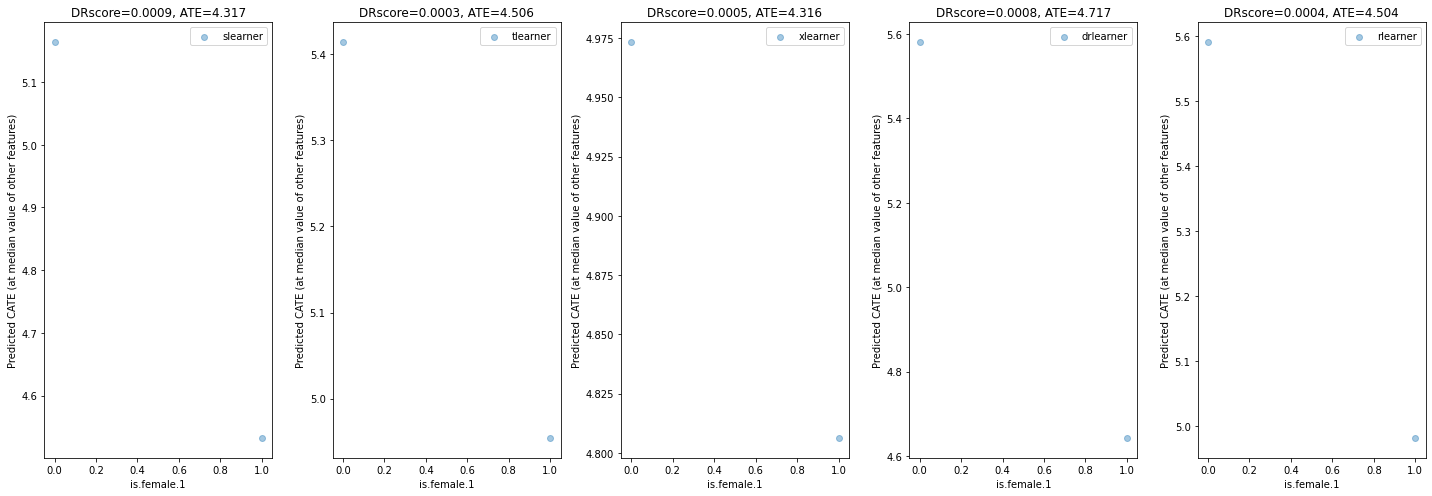

In [ ]:
xfeat = 'is.female.1'
grid = np.unique(np.percentile(X[xfeat], np.arange(0, 105, 5)))
Xpd = pd.DataFrame(np.tile(np.median(X, axis=0, keepdims=True), (len(grid), 1)),
                        columns=X.columns)
Xpd[xfeat] = grid
plt.figure(figsize=(20, 7))
for it, (name, model, score) in enumerate(zip(names, models, scores)):
    plt.subplot(1, len(models), it + 1)
    preds = model.predict(Xpd[hetero_feats])
    plt.scatter(Xpd[xfeat], preds, label=name, alpha=.4)
    plt.title(f'{score_name}={score:.4f}, ATE={np.mean(model.predict(Z)):.3f}')
    plt.legend()
    plt.xlabel(xfeat)
    plt.ylabel('Predicted CATE (at median value of other features)')
plt.tight_layout()
plt.show()

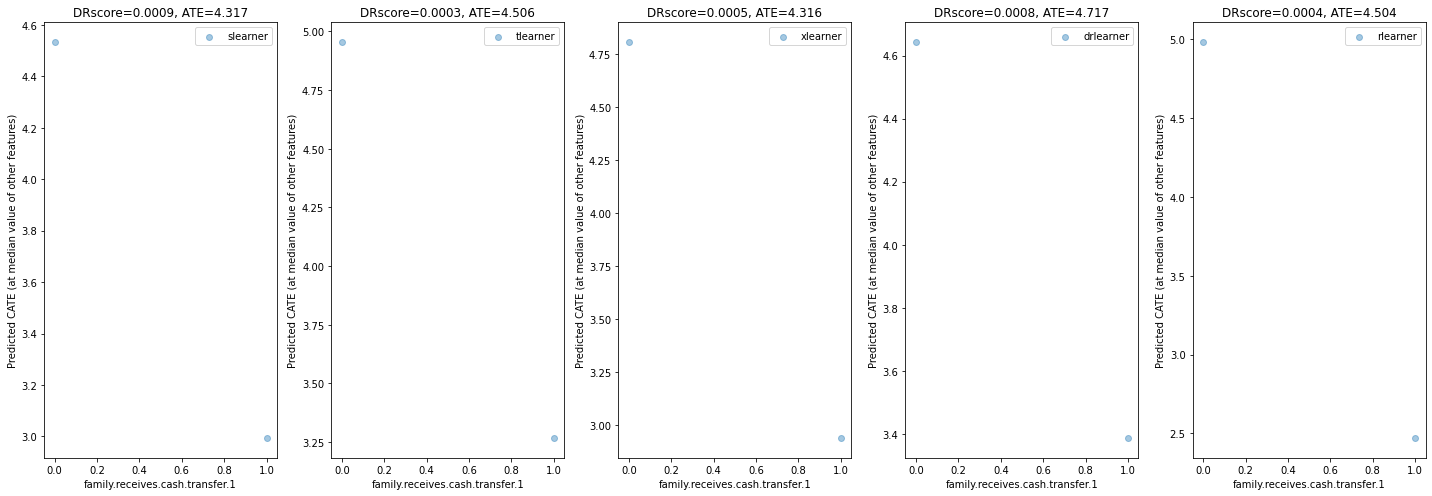

In [ ]:
xfeat = 'family.receives.cash.transfer.1'
grid = np.unique(np.percentile(X[xfeat], np.arange(0, 105, 5)))
Xpd = pd.DataFrame(np.tile(np.median(X, axis=0, keepdims=True), (len(grid), 1)),
                        columns=X.columns)
Xpd[xfeat] = grid
plt.figure(figsize=(20, 7))
for it, (name, model, score) in enumerate(zip(names, models, scores)):
    plt.subplot(1, len(models), it + 1)
    preds = model.predict(Xpd[hetero_feats])
    plt.scatter(Xpd[xfeat], preds, label=name, alpha=.4)
    plt.title(f'{score_name}={score:.4f}, ATE={np.mean(model.predict(Z)):.3f}')
    plt.legend()
    plt.xlabel(xfeat)
    plt.ylabel('Predicted CATE (at median value of other features)')
plt.tight_layout()
plt.show()

## Confidence Interval for DR Learner

In [ ]:
from statsmodels.formula.api import ols
blp_formula = 'C(female)'
df = X.copy()
df.rename(columns={"is.female.1": "female"}, inplace = True)
df['dr'] = dr_preds

In [ ]:
lr = ols('dr ~ ' + blp_formula, df).fit(cov_type='HC1')

In [ ]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dr   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.599
Date:                Wed, 22 Mar 2023   Prob (F-statistic):              0.107
Time:                        06:18:28   Log-Likelihood:                -40364.
No. Observations:                8477   AIC:                         8.073e+04
Df Residuals:                    8475   BIC:                         8.075e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.9441      0.439      8.986      0.000       3.084       4.804
C(female)[T.1]     0.9909      0.615      1.612      0.107      -0.214       2.196
==============================================================================
Omnibus:                      155.695   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.005
Skew:                          -0.060   Prob(JB):                     4.71e-20
Kurtosis:                       2.513   Cond. No.                         2.67
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [ ]:
blp_formula = 'C(cash)'
df = X.copy()
df.rename(columns={"family.receives.cash.transfer.1": "cash"}, inplace = True)
df['dr'] = dr_preds
lr = ols('dr ~ ' + blp_formula, df).fit(cov_type='HC1')
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dr   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.02447
Date:                Wed, 22 Mar 2023   Prob (F-statistic):              0.876
Time:                        06:19:37   Log-Likelihood:                -40366.
No. Observations:                8477   AIC:                         8.074e+04
Df Residuals:                    8475   BIC:                         8.075e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.4927      0.372     12.093      0.000       3.765       5.221
C(cash)[T.1]    -0.1035      0.662     -0.156      0.876      -1.400       1.193
==============================================================================
Omnibus:                      154.104   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.239
Skew:                          -0.059   Prob(JB):                     6.90e-20
Kurtosis:                       2.514   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

# Part d: Analysis

Questions: Compare the results of the three methods and what do the corresponding treatment effects imply about the real world. Are the results consistent with each other and if not what could be causing the difference? Are any findings statistically significant? Are the numbers returned by the methods reasonable? If they are not what violation of the assumptions of each of the methods could have caused this. Are there any of the assumptions of the methods potentially being violated in the way the dataset was collected. 

For the first two methods, the p-value for the coefficient of D is < 0.05, so our result is significant at the 5 percent significance level. This implies that receiving the financial education increases financial proficiency. This is a reasonable finding that matches the finding of a research paper that uses this dataset. There are also other intersting statistically significant coefficients, including gender, whether the student has failed a school year before, and whether the student is employed.

For the third method our Drscore of each method ('slearner', 'tlearner', 'xlearner', 'drlearner', 'rlearner') and all of them has the value larger than 0 which implies that our CATE model predictions are better than the predictions using just a constant treatment effect. However, looking at the confidence interval for the DR learner, we see that the finding is not significant. We think that this is reasonable. Using domain knowledge, we don't expect gender to have a significant impact on how the treatment changest the financial proficiency score. We don't have any findings that point us to the violations of assumptions that our methods use.